<a href="https://colab.research.google.com/github/SahilR02/ADS-Experiments/blob/main/ADS%20Experiment%208/ADS_Exp8_SahilR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import precision_score

**Data Exploration**

In [ ]:
data = pd.read_csv('/content/train.csv')
data.head()

,id,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [ ]:
data.describe()

,id,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [ ]:
data.isnull().sum()

id                      0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [ ]:
data.columns

Index(['id', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'New/Resale',
       'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff',
       '24x7 Security', 'Children's Play Area', 'Clubhouse', 'Intercom',
       'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
       'Swimming Pool'],
      dtype='object')

<ipython-input-7-192440655bf4>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


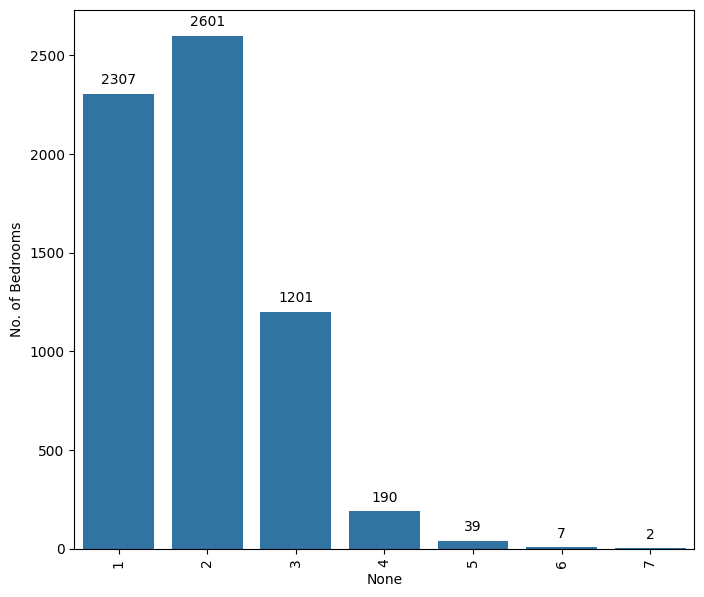

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))

bedroom_num = data['No. of Bedrooms'].value_counts()
chart = sns.barplot(x=bedroom_num.index, y=bedroom_num)
for p in chart.patches:
    chart.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 10),
                 textcoords='offset points',
                 fontsize=10)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


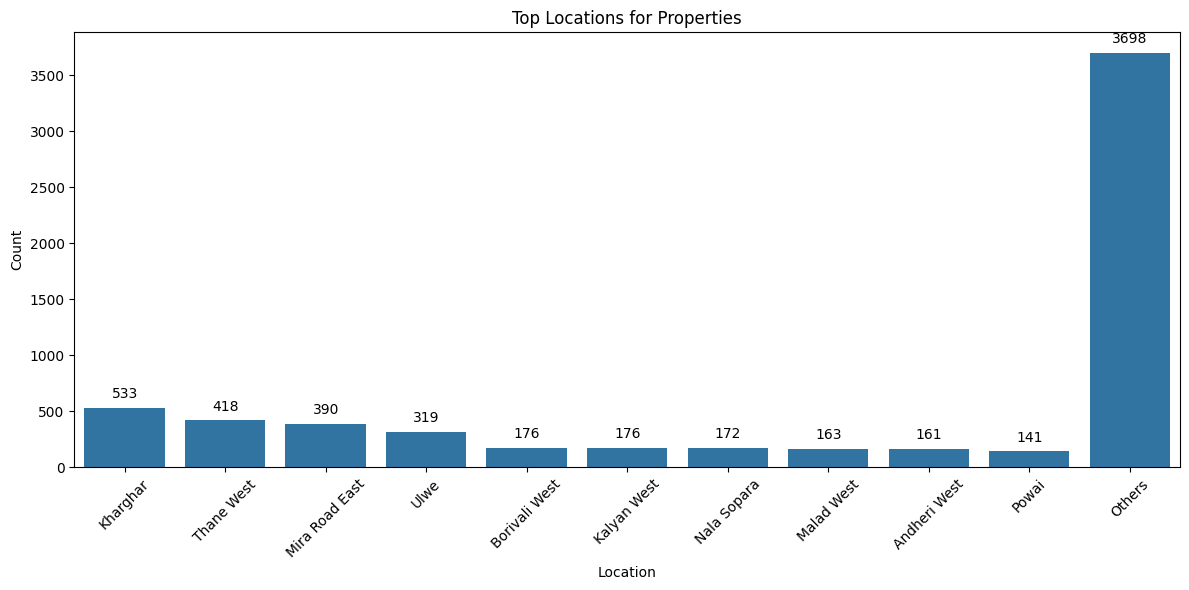

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Count the occurrences of each location
location_counts = data['Location'].value_counts()

# Set the number of top locations to show
top_n = 10

# Select only the top locations
top_locations = location_counts.head(top_n)

# If there are more locations, group the rest as 'Others'
if len(location_counts) > top_n:
    top_locations['Others'] = location_counts[top_n:].sum()

# Create the bar plot
chart = sns.barplot(x=top_locations.index, y=top_locations)

# Annotate the bars with their counts
for p in chart.patches:
    chart.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 10),
                 textcoords='offset points',
                 fontsize=10)

plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top Locations for Properties')
plt.tight_layout()
plt.show()


**Correlation between Variables using HeatMap**

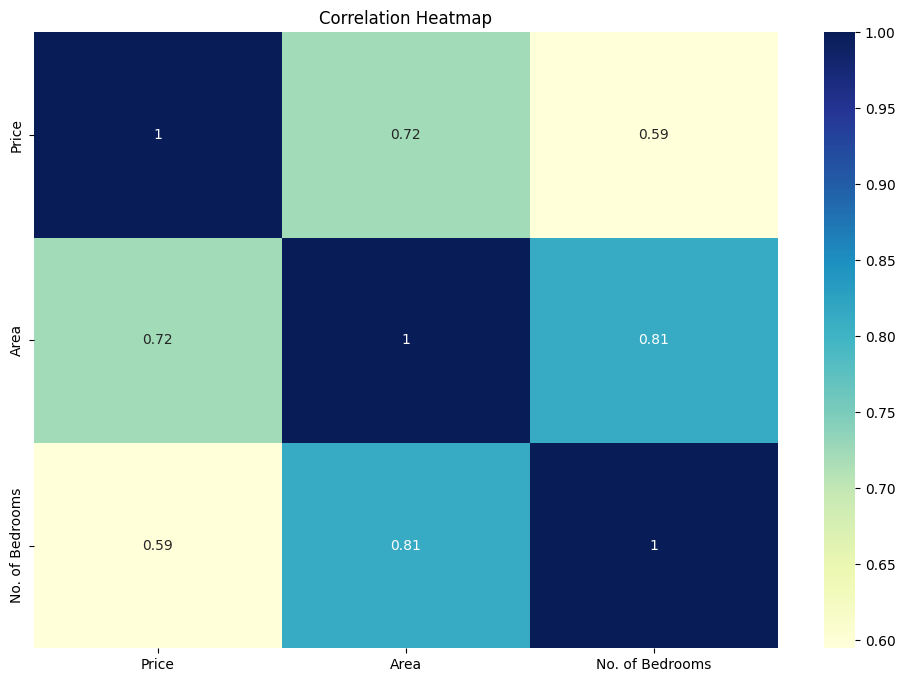

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Selecting numerical columns for correlation analysis
numerical_columns = ['Price', 'Area', 'No. of Bedrooms']

# Calculating the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

plt.title('Correlation Heatmap')
plt.show()


In [ ]:
mean_price_by_location = data.groupby('Location')[['Price']].mean().sort_values(by='Price')

print(mean_price_by_location)


                          Price
Location                       
Bhoiwada Kalyan       2000000.0
Ambivli               2000000.0
Vasind                2000000.0
Asangaon              2035000.0
ulhasnagar 4          2050000.0
...                         ...
Yari Road           122500000.0
worli sea Fase      153600000.0
Hanuman Nagar       165000000.0
juhu tara           180000000.0
Worli South Mumbai  233250000.0

[413 rows x 1 columns]


In [ ]:
X = data[['Area', 'No. of Bedrooms', 'Gymnasium', 'Lift Available', 'Car Parking',
                 'Maintenance Staff', '24x7 Security', "Children's Play Area", 'Clubhouse',
                 'Intercom', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track',
                 'Swimming Pool']]

y = data['Price'].values


In [ ]:
X.head()

,Area,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,720,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,600,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,650,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,650,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,665,1,0,1,1,1,1,0,0,1,1,0,0,0,0


In [ ]:
# Assuming your dataset is named 'df'
print(data['Price'].head(10))


0     4850000
1     4500000
2     6700000
3     4500000
4     5000000
5    17000000
6    12500000
7    10500000
8    10500000
9    15000000
Name: Price, dtype: int64


**Model**

In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.2 , random_state = 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target variable
X = data.drop(columns=['Price', 'id'])  # Features
y = data['Price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for categorical variables
categorical_features = ['Location']  # Assuming 'Location' is the categorical column
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
])

# Append classifier to preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)


Mean Squared Error: 220274472868108.22
R-squared (R²): 0.2967710911938054


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Assuming 'train_X' and 'train_y' are your training features and target variable, respectively

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
accuracies = cross_val_score(estimator=rf_regressor, X=train_X, y=train_y, cv=10)

# Print the accuracies
print("Accuracies:", accuracies)
print("Mean Accuracy:", accuracies.mean())
print("Standard Deviation of Accuracy:", accuracies.std())


Accuracies: [0.65790779 0.74182593 0.35994253 0.63987689 0.52813866 0.47947011
 0.63356995 0.29523878 0.56188616 0.52539762]
Mean Accuracy: 0.5423254425330735
Standard Deviation of Accuracy: 0.13043701372726602


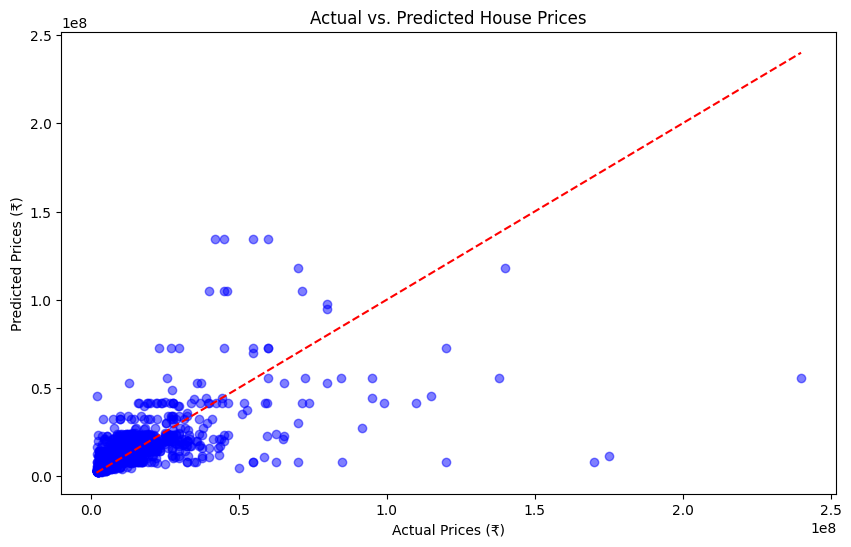

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plotting the diagonal line
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual Prices (₹)')
plt.ylabel('Predicted Prices (₹)')
plt.show()


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define categorical and numerical columns
categorical_columns = ['Location', 'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security', "Children's Play Area", 'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool']
numeric_columns = ['Area', 'No. of Bedrooms']

# Define preprocessing steps for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for both types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
])

# Define the model
model = RandomForestRegressor()

# Create a pipeline that combines preprocessing and modeling
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Perform k-fold cross-validation (e.g., with 5 folds)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())


Cross-Validation RMSE Scores: [12403358.06535706 12764028.72457419  7226491.94919278 13642452.6969742
 10412169.62191046]
Mean RMSE: 11289700.211601738
